In [1]:
import mvp
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
DB_PATH = '/home/naga/FintelligenceData/MetaTrader_M1.db'
petr3_raw = mvp.rawdata.RawData('PETR3',DB_PATH)
petr3_raw.df = petr3_raw.change_sample_interval(start = pd.Timestamp('2019-01-20 10:15:00'),stop = pd.Timestamp('2020-12-20 10:15:00'),time_step=60)

In [2]:
parameters = {'ModelParameters':{'threshold':0.01}}
model_classical = mvp.primary.PrimaryModel(petr3_raw,'classical-filter',parameters)

In [3]:
parameters = {'ModelParameters':{'MA':[50,200]}}
model_MA = mvp.primary.PrimaryModel(petr3_raw,'crossing-MA',parameters)

In [4]:
parameters = {'ModelParameters':{'MA':[100],'DEV':[100],'K_value':2}}
model_bollinger = mvp.primary.PrimaryModel(petr3_raw,'bollinger-bands',parameters)

In [5]:
parameters = {'SL': 0.10, 'TP': 0.80, 'IH': 1000}
labels_MA = mvp.labels.Labels(model_MA.events_df,parameters,'suggestion')
labels_classical = mvp.labels.Labels(model_classical.events_df,parameters,'suggestion')
labels_bollinger = mvp.labels.Labels(model_bollinger.events_df,parameters,'suggestion')

In [6]:
def plot_model(model, labels):
    #Plotting Bollinger: (recieving a model and labels for triggers)
    if model.model_type == 'bollinger-bands':
        MA_name = 'MA_'+str(model.model_parameters['MA'][0])
        DEV_name = 'DEV_'+str(model.model_parameters['DEV'][0])
        K_value = model.model_parameters['K_value']
        plot_data = model.feature_data.df_curated.copy()
        plot_data= pd.concat([plot_data,labels],axis=1).copy()
        plot_data['UpBand'] = plot_data[MA_name] + K_value*plot_data[DEV_name]
        plot_data['DownBand'] = plot_data[MA_name] - K_value*plot_data[DEV_name]
        buy_profit = plot_data[(plot_data['Suggestion']==1) & (plot_data['Label']==1)][['Close']]
        buy_loss = plot_data[(plot_data['Suggestion']==1) & (plot_data['Label']==-1)][['Close']]
        buy_neutral = plot_data[(plot_data['Suggestion']==1) & (plot_data['Label']==0)][['Close']]
        plt.scatter(buy_profit.index, buy_profit['Close'], c='g', s = 0.1)
        plt.scatter(buy_loss.index, buy_loss['Close'], c='r', s = 0.1)
        plt.scatter(buy_neutral.index, buy_neutral['Close'], c='b', s = 0.1)
        plot_data.Close.plot(linewidth = 0.1)
        plot_data[MA_name].plot(linewidth = 0.1)
        plot_data.UpBand.plot(linewidth = 0.1)
        plot_data.DownBand.plot(linewidth = 0.1)
        return None

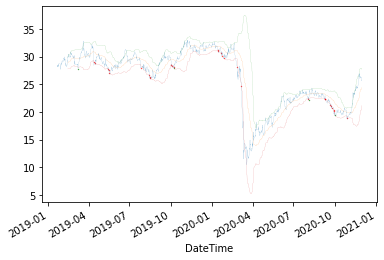

In [7]:
plot_model(model_bollinger,labels_bollinger.labeled_df)

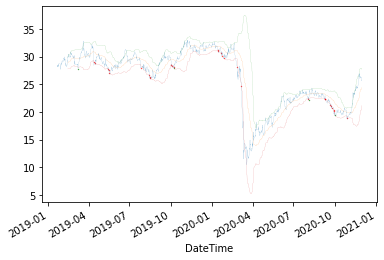

In [6]:
mvp.draw.plot_model(model_bollinger,labels_bollinger.labeled_df)